# LG

## 載入套件

In [175]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
#載入訓練組及測試組分組套件
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

%matplotlib inline

preprocess_status = '_under'

## read train dataset

In [176]:
df_tr = pd.read_excel("./preprocess/output_tr" + preprocess_status + ".xlsx", engine='openpyxl')
df_tr.head(3)

,AGE,SEX,LOS,Joint,Drain,Cemented,Commercial_ALBC,Non_commercial_ALBC,cci_index,elx_index,...,Fluid and Electrolyte Disorders,Blood Loss Anemia,Deficiency Anemia,Anemia,Alcohol Abuse,Drug Abuse,Psychoses,Depression,Psyciatric disorder,outcome
0,63,0,5.58,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,66,0,3.13,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,76,0,4.03,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


## read test dataset

In [146]:
df_ts = pd.read_excel("ts.xlsx", engine='openpyxl')
df_ts.head(3)

,AGE,SEX,LOS,Joint,Drain,Cemented,Commercial_ALBC,Non_commercial_ALBC,cci_index,elx_index,...,Weight Loss,Fluid and Electrolyte Disorders,Blood Loss Anemia,Deficiency Anemia,Anemia,Alcohol Abuse,Drug Abuse,Psychoses,Depression,Psyciatric disorder
0,81.0,M,3.0,TKA,1,1,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
1,34.0,F,3.0,THA,0,0,0,0,1,2,...,0,0,0,0,0,0,0,0,0,0
2,54.0,F,6.0,TKA,1,1,0,1,0,1,...,0,0,0,0,0,0,0,0,0,0


In [177]:
# Separate majority and minority classes
df_majority = df_tr[df_tr.outcome==0]
df_minority = df_tr[df_tr.outcome==1]

print('#: ', len(df_tr))
print('#0: ', len(df_majority))
print('#1: ', len(df_minority))
print('差',len(df_majority)/len(df_minority),'倍')

#:  1742
#0:  871
#1:  871
差 1.0 倍


## 將資料分成訓練組及測試組

In [178]:
X = df_tr.drop('outcome', 1)
y = df_tr['outcome']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(1742, 66)
(1742,)
(1742, 66)
(1742,)


In [132]:
X_train

,AGE,SEX,LOS,Joint,Drain,Cemented,Commercial_ALBC,Non_commercial_ALBC,cci_index,elx_index,...,Weight Loss,Fluid and Electrolyte Disorders,Blood Loss Anemia,Deficiency Anemia,Anemia,Alcohol Abuse,Drug Abuse,Psychoses,Depression,Psyciatric disorder
0,-1,1,0.82,0,1,1,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,-0.20,0,1,1,1,0,1,1,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0.82,0,1,1,0,1,1,1,...,0,0,0,0,0,0,0,0,0,0
3,0,0,2.86,0,1,1,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
4,-1,1,-0.54,0,1,0,0,0,1,2,...,0,0,0,1,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96533,0,1,0.92,0,1,1,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
96534,-1,1,0.63,0,1,1,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
96535,1,1,0.19,0,1,1,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
96536,-1,0,0.03,0,1,1,0,1,1,1,...,0,0,0,0,0,0,0,0,0,0


In [88]:
y_train

0        1
1        1
2        1
3        1
4        1
        ..
96453    1
96454    1
96455    1
96456    1
96457    1
Name: outcome, Length: 96458, dtype: int64

## LG 邏輯迴歸

### train

In [164]:
# 加權
weights = {0:1.0, 1:55.0}
logmodel = LogisticRegression(solver='lbfgs', class_weight=weights)
logmodel.fit(X_train,y_train)

C:\Users\User\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(class_weight={0: 1.0, 1: 55.0})

In [275]:
# 建立訓練組邏輯迴歸模型
logmodel = LogisticRegression(max_iter = 2000)
logmodel.fit(X_train,y_train)

C:\Users\User\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(max_iter=2000)

In [276]:
# 印出係數
print('係數：', logmodel.coef_)

# 印出截距
print('截距：', logmodel.intercept_ )

係數： [[ 4.44170172e-03  1.87839995e+00 -1.25325967e-01  4.04720776e+00
   2.87729585e+00  1.97331334e+00  1.39135857e+00  3.09348934e+00
  -9.85989057e-02 -1.68960181e-01  1.19206317e+00 -2.19218063e-01
   9.86615559e-01 -4.87671942e-02  1.73080971e+00  6.00427173e-01
  -2.39226921e-01  1.29357993e-01  6.28714789e-02 -4.29482636e-01
  -8.18914079e-02 -3.39987689e-03 -7.67742316e-01  5.77240667e-02
  -8.09391446e-01  1.92409350e-02 -3.58847437e-02 -4.46243433e-01
   1.06553620e-01 -1.95705659e+00 -1.64839221e-01  3.97230817e-01
   1.86003300e-01  1.49539579e-01  4.29953851e-01  7.57942631e-01
   9.01935140e-04  1.61248429e-01  2.09292052e+00 -9.02451361e-01
   9.59116985e-02  9.04243254e-01  9.05145189e-01  5.85927071e-01
   4.97126681e-02  9.52337065e-01  2.62505432e-01  1.81927948e+00
   0.00000000e+00  0.00000000e+00  5.37529334e-02  3.92653853e-01
   2.09861415e-01  1.14838385e+00 -8.99930097e-02  4.29584507e-02
   3.31122314e-05  6.21483887e-01 -9.11634800e-01  3.00118414e-01
  -6.1

### test

In [277]:
#預測
#使用模型來預測
predictions = logmodel.predict(X_test)
predictions

array([0, 0, 0, ..., 1, 1, 1], dtype=int64)

In [278]:
# 看到該樣本在各個類別事件發生的機率
predictions_proba = logmodel.predict_proba(X_test)
predictions_proba

array([[9.99848991e-01, 1.51008706e-04],
       [9.78149517e-01, 2.18504826e-02],
       [9.81677957e-01, 1.83220429e-02],
       ...,
       [6.08670649e-04, 9.99391329e-01],
       [2.12827179e-03, 9.97871728e-01],
       [5.96738560e-04, 9.99403261e-01]])

In [279]:
logmodel.score(X_test,y_test)

0.981630309988519

In [280]:
#載入classificationo_report來看預測和實際值的差異，包含precision、recall、f1-score及support
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.98      0.98      0.98       871
           1       0.98      0.98      0.98       871

    accuracy                           0.98      1742
   macro avg       0.98      0.98      0.98      1742
weighted avg       0.98      0.98      0.98      1742



In [281]:
confu_matrix = confusion_matrix(y_test, predictions)
confu_matrix

array([[853,  18],
       [ 14, 857]], dtype=int64)

### evaluate

In [282]:
# 模型績效
mse = np.mean((predictions - y_test) ** 2)
r_squared = logmodel.score(X_train, y_test)
adj_r_squared = r_squared - (1 - r_squared) * (X_train.shape[1] / (X_train.shape[0] - X_train.shape[1] - 1))

# 印出模型績效
print(mse)
print(r_squared)
print(adj_r_squared)

0.018369690011481057
0.981630309988519
0.9809064893671711


### save the model

In [201]:
# save the model to disk
import pickle
filename = './model/lg/logmodel' + preprocess_status + '.sav'
pickle.dump(logmodel, open(filename, 'wb'))

## 視覺化

<AxesSubplot:>

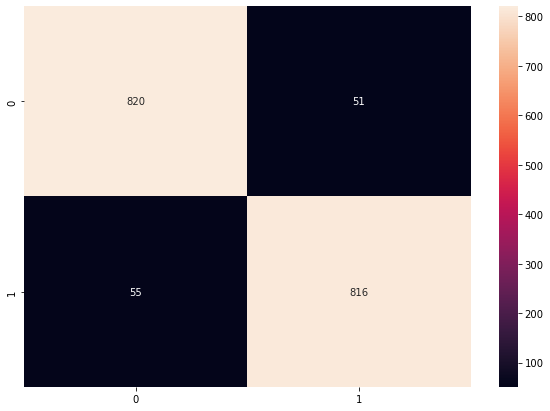

In [202]:
import seaborn as sn
df_cm = pd.DataFrame(confu_matrix, index = [i for i in "01"],
                  columns = [i for i in "01"])
plt.figure(figsize = (10,7))
sn.heatmap(df_cm, fmt = ".20g", annot=True)

In [283]:
import math


#      |  (a)  |  (b)  |
# --------------------------
# (a)  |  TP   |  FN   |
# --------------------------
# (b)  |  FP   |  TN   |

tp = confu_matrix[0, 0]
fp = confu_matrix[0, 1]
fn = confu_matrix[1, 0]
tn = confu_matrix[1, 1]

acc = (tp + tn) / (tp + fp + tn + fn)
f1 = (2 * tp) / (2 * tp + fp + fn)
ppv = (tp) / (tp + fp)
recall = (tp) / (tp + fn)
mcc = ((tp * tn) - (fp * fn)) / (math.sqrt((tp + fp) * (tp + fn) * (tn + fp) * (tn + fn)))

tpr = tp / (tp + fn)
fpr = fp / (fp + tn) 
auc = 1/2 - fpr/2 + tpr/2


print('acc: ', acc)
print('f1: ', f1)
print('ppv: ', ppv)
print('recall: ', recall)
print('mcc: ', mcc)
print('auc: ', auc)

acc:  0.981630309988519
f1:  0.9815880322209436
ppv:  0.9793340987370838
recall:  0.9838523644752019
mcc:  0.9632707778868462
auc:  0.9816404679518866


### AUC Curve

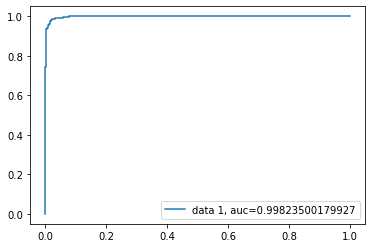

In [284]:
from sklearn import metrics
y_pred_proba = logmodel.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()

In [288]:
from sklearn.metrics import log_loss
log_loss(y_test, predictions)

0.6344748779511407